# COGS 108 - Data Checkpoint

# Names

- Rohith Pillai
- Luke Taylor
- Pratheek Sankeshi
- Josh Puray
- Christian Tapia

<a id='research_question'></a>
# Research Question

Can we use a model to predict an NBA player’s salary and duration of their next contract? And how accurately can this be done with features publicly available?

# Dataset(s)

*Fill in your dataset information here*
 
### 1
- Dataset Name: NBA Players - Advanced Season Stats
- Link to the dataset: https://www.kaggle.com/datasets/whitefero/nba-players-advanced-season-stats-19782016
- Number of observations: 24691
- 1-2 sentences describing each dataset: This data contains most of the statistics that measure an NBA players effectiveness such as games played, points scored, player efficiency rating, minutes played, true shooting percentage, box plus/minus, and many more which are sorted by player, team and year. Altogether there are 109 metrics which we can play with to better understand each player in a given season on a given team.

### 2
- Dataset Name: NBA Player Stats
- Link to the dataset:  https://www.kaggle.com/datasets/drgilermo/nba-players-stats
- Number of observations: 4550
- 1-2 sentences describing each dataset: This data contains normal stats of players like points per game, assists per game and rebounds per game. We are only using data 1990 onwards

### 3
- Dataset Name: NBA Player Salary (1990-2017)
- Link to the dataset:  https://www.kaggle.com/datasets/whitefero/nba-player-salary-19902017
- Number of observations: 11837
- 1-2 sentences describing each dataset: This data contains the salaries from 1990 to 2017 of all nba players who played during this time

### How we merge
No merging is done since we use a single dataset,

# Setup

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns    
from matplotlib.pyplot import figure
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [4]:
credit  = pd.read_csv('Application_Data.csv')
credit.head()

Applicant_ID Applicant_Gender  Owned_Car  Owned_Realty  Total_Children  \
0       5008806          M                1             1               0   
1       5008808          F                0             1               0   
2       5008809          F                0             1               0   
3       5008810          F                0             1               0   
4       5008811          F                0             1               0   

   Total_Income                                        Income_Type  \
0        112500  Working                                       ...   
1        270000  Commercial associate                          ...   
2        270000  Commercial associate                          ...   
3        270000  Commercial associate                          ...   
4        270000  Commercial associate                          ...   

                                      Education_Type  \
0  Secondary / secondary special                 ...   
1  Secondary / secondary special                 ...   
2  Secondary / secondary special                 ...   
3  Secondary / secondary special                 ...   
4  Secondary / secondary special                 ...   

                                       Family_Status  \
0  Married                                       ...   
1  Single / not married                          ...   
2  Single / not married                          ...   
3  Single / not married                          ...   
4  Single / not married                          ...   

                                        Housing_Type  ...  Owned_Work_Phone  \
0  House / apartment                             ...  ...                 0   
1  House / apartment                             ...  ...                 0   
2  House / apartment                             ...  ...                 0   
3  House / apartment                             ...  ...                 0   
4  House / apartment                             ...  ...                 0   

   Owned_Phone  Owned_Email  \
0            0            0   
1            1            1   
2            1            1   
3            1            1   
4            1            1   

                                           Job_Title Total_Family_Members  \
0  Security staff                                ...                    2   
1  Sales staff                                   ...                    1   
2  Sales staff                                   ...                    1   
3  Sales staff                                   ...                    1   
4  Sales staff                                   ...                    1   

   Applicant_Age  Years_of_Working  Total_Bad_Debt  Total_Good_Debt  Status  
0             59                 4               0               30       1  
1             53                 9               0                5       1  
2             53                 9               0                5       1  
3             53                 9               0               27       1  
4             53                 9               0               39       1  

[5 rows x 21 columns]

In [6]:
print(credit.dtypes)

Applicant_ID             int64
Applicant_Gender        object
Owned_Car                int64
Owned_Realty             int64
Total_Children           int64
Total_Income             int64
Income_Type             object
Education_Type          object
Family_Status           object
Housing_Type            object
Owned_Mobile_Phone       int64
Owned_Work_Phone         int64
Owned_Phone              int64
Owned_Email              int64
Job_Title               object
Total_Family_Members     int64
Applicant_Age            int64
Years_of_Working         int64
Total_Bad_Debt           int64
Total_Good_Debt          int64
Status                   int64
dtype: object


In [5]:
credit.describe()

Applicant_ID     Owned_Car  Owned_Realty  Total_Children  Total_Income  \
count  2.512800e+04  25128.000000  25128.000000    25128.000000  2.512800e+04   
mean   5.078835e+06      0.418378      0.654927        0.509472  1.948365e+05   
std    4.194378e+04      0.493303      0.475402        0.762937  1.045211e+05   
min    5.008806e+06      0.000000      0.000000        0.000000  2.700000e+04   
25%    5.042226e+06      0.000000      0.000000        0.000000  1.350000e+05   
50%    5.079004e+06      0.000000      1.000000        0.000000  1.800000e+05   
75%    5.115603e+06      1.000000      1.000000        1.000000  2.250000e+05   
max    5.150487e+06      1.000000      1.000000        5.000000  1.575000e+06   

       Owned_Mobile_Phone  Owned_Work_Phone   Owned_Phone   Owned_Email  \
count             25128.0      25128.000000  25128.000000  25128.000000   
mean                  1.0          0.273758      0.292741      0.100684   
std                   0.0          0.445895      0.455030      0.300916   
min                   1.0          0.000000      0.000000      0.000000   
25%                   1.0          0.000000      0.000000      0.000000   
50%                   1.0          0.000000      0.000000      0.000000   
75%                   1.0          1.000000      1.000000      0.000000   
max                   1.0          1.000000      1.000000      1.000000   

       Total_Family_Members  Applicant_Age  Years_of_Working  Total_Bad_Debt  \
count          25128.000000   25128.000000      25128.000000    25128.000000   
mean               2.291309      40.995503          7.690903        0.333095   
std                0.928871       9.552832          6.415007        1.569448   
min                1.000000      21.000000          1.000000        0.000000   
25%                2.000000      33.000000          3.000000        0.000000   
50%                2.000000      40.000000          6.000000        0.000000   
75%                3.000000      48.000000         10.000000        0.000000   
max                7.000000      68.000000         44.000000       49.000000   

       Total_Good_Debt        Status  
count     25128.000000  25128.000000  
mean         21.057545      0.995185  
std          14.735347      0.069227  
min           1.000000      0.000000  
25%           9.000000      1.000000  
50%          18.000000      1.000000  
75%          31.000000      1.000000  
max          61.000000      1.000000

# Data Cleaning

#### Data Cleaning Steps

Getting the data for only players who played from 1990 and beyond

In [75]:
player_data_1990 = player_data[player_data['year_start']>=1990]
seasons_stats_1990 = seasons_stats[seasons_stats['Year']>=1990]

Found out the names of all players that have been duplicated in our player_data dataset. We removed these players
from the seasons_stats as well as the player_data dataset since including this data will create issues when we merge
dataframes. While we lose data, there are only 13 duplicated players so we do not lose too much information, and 
since there are a lot of repeated data in the seasons_stats dataset (for each year/when they got traded in a year etc), 
we found that the cleanest solution was to avoid players that were duplicated

In [76]:
duplicated_players = list(player_data_1990[player_data_1990['name'].duplicated()]['name'])
seasons_stats_1990 = seasons_stats_1990[~seasons_stats_1990['Player'].isin(duplicated_players)]
player_data_1990 = player_data_1990[~player_data_1990['name'].isin(duplicated_players)]
salaries = salaries[~salaries['Player Name'].isin(duplicated_players)]

Carrying out the merges as described in the description and removing duplicated columns

In [77]:
merged_data = seasons_stats_1990.merge(player_data_1990.merge(salaries, left_on='name', 
                                                              right_on='Player Name'), left_on=['Player', 'Year'], 
                                       right_on=['Player Name', 'Season Start'])
merged_data = merged_data.drop(['Player Name', 'Player', 'Unnamed: 0', 'Year', 'Team', 'Tm'], axis=1)

Removing unnecessary features: These features will likely have no effect on making predictions. Since we already have an excessive amount of features (over 60), we will remove more in the long run after performing EDA. But for the time being at the data cleaning stage, we are removing only those ones that will almost certainly have no effect on making predictions on salary


In [78]:
merged_data = merged_data.drop(['weight', 'college', 'birth_date', 'Register Value', 'blanl', 'blank2', 'VORP'], axis=1)

In [79]:
merged_data.isnull().sum()

Pos                  0
Age                  0
G                    0
GS                   0
MP                   0
PER                  0
TS%                 26
3PAr                31
FTr                 31
ORB%                 0
DRB%                 0
TRB%                 0
AST%                 0
STL%                 0
BLK%                 0
TOV%                21
USG%                 0
OWS                  0
DWS                  0
WS                   0
WS/48                0
OBPM                 0
DBPM                 0
BPM                  0
FG                   0
FGA                  0
FG%                 31
3P                   0
3PA                  0
3P%               1381
2P                   0
2PA                  0
2P%                 41
eFG%                31
FT                   0
FTA                  0
FT%                223
ORB                  0
DRB                  0
TRB                  0
AST                  0
STL                  0
BLK                  0
TOV        

We see that the column with the most null values is 3P%. After doing EDA we found that the scenarios when this column is nan corresponds to when 3P and 3PA are 0. As a result, to take care of this, we filled these values in the column with 0. After more EDA, we found that when column values are missing, it usually indicates that the player never attempted anything that would fill up that particular stat. So it makes sense to fill missing values with 0. All the missing values correspond to columns with numerical features. This is how we dealt with missingness in this dataset

In [80]:
merged_data = merged_data.fillna(0)

Rearranging the column order so that name and team come first

In [81]:
name = merged_data['name']
team = merged_data['Full Team Name']
merged_data = merged_data.drop(['name', 'Full Team Name'], axis=1)
merged_data.insert(loc=0, column='Name', value=name)
merged_data.insert(loc=1, column='Team', value=team)

In [82]:
merged_data.head()

Name                   Team Pos   Age     G    GS      MP   PER  \
0   Nick Anderson          Orlando Magic  SG  22.0  81.0   9.0  1785.0  14.9   
1  Michael Ansley          Orlando Magic  SF  22.0  72.0   5.0  1221.0  17.3   
2  B.J. Armstrong          Chicago Bulls  PG  22.0  81.0   0.0  1291.0  11.9   
3     Dana Barros  Oklahoma City Thunder  PG  22.0  81.0  25.0  1630.0  12.8   
4    Kenny Battle         Denver Nuggets  SG  25.0  59.0   8.0   729.0  12.2   

     TS%   3PAr  ...    TOV     PF    PTS  year_start  year_end  position  \
0  0.536  0.023  ...  138.0  140.0  931.0        1990      2002       F-G   
1  0.554  0.000  ...   50.0  152.0  626.0        1990      1992         F   
2  0.530  0.015  ...   83.0  105.0  452.0        1990      2000         G   
3  0.497  0.322  ...  123.0   97.0  782.0        1990      2004         G   
4  0.587  0.024  ...   32.0   94.0  242.0        1990      1993         F   

   height  Salary in $  Season Start  Season End  
0     6-6       725000          1990        1991  
1     6-7       200000          1990        1991  
2     6-2       425000          1990        1991  
3    5-11       500000          1990        1991  
4     6-6       350000          1990        1991  

[5 rows x 55 columns]

# Data Analysis & Results (EDA)


Carry out EDA on your dataset(s); Describe in this section

In [83]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

### Shape of the data

In [84]:
#determine shape of the data
merged_data.shape

(9621, 55)

We remove the percentage columns and keep true values instead. We also remove columns that are specifically for defense or offense, for whose metric the allround stat exists. We also remove duplicate columns

In [85]:

merged_data = merged_data.drop(['AST%', 'TOV%', 'ORB%', 'DRB%', 'STL%','BLK%','OWS','DWS','WS/48','OBPM','DBPM','FGA','3PA','2PA', '2P%', 'eFG%','3PAr','FTA','ORB', 'DRB','PF', 'FTr','height','year_start', 'year_end'], axis=1)

In [86]:
merged_data.columns

Index(['Name', 'Team', 'Pos', 'Age', 'G', 'GS', 'MP', 'PER', 'TS%', 'TRB%',
       'USG%', 'WS', 'BPM', 'FG', 'FG%', '3P', '3P%', '2P', 'FT', 'FT%', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PTS', 'position', 'Salary in $',
       'Season Start', 'Season End'],
      dtype='object')

### Descriptive statistics for all quantitative variables 

Just to understand the data a little bit better descriptive statistics for quantitative variables. Just to understand the data a little bit better

In [87]:
merged_data.describe()

Age          G           GS           MP          PER  \
count  9621.000000  9621.0000  9621.000000  9621.000000  9621.000000   
mean     26.290822    52.4855    25.576239  1244.003326    13.005415   
std       3.877360    24.5929    28.456056   882.838585     5.425602   
min      18.000000     1.0000     0.000000     1.000000   -90.600000   
25%      23.000000    32.0000     1.000000   472.000000    10.300000   
50%      26.000000    58.0000    12.000000  1130.000000    13.100000   
75%      29.000000    75.0000    48.000000  1937.000000    15.800000   
max      40.000000    85.0000    83.000000  3533.000000    90.300000   

               TS%         TRB%         USG%           WS          BPM  ...  \
count  9621.000000  9621.000000  9621.000000  9621.000000  9621.000000  ...   
mean      0.511323    10.022908    18.903378     2.552188    -1.767706  ...   
std       0.082944     4.746357     5.114495     2.843534     4.057537  ...   
min       0.000000     0.000000     0.000000    -2.100000   -86.700000  ...   
25%       0.481000     6.200000    15.500000     0.400000    -3.500000  ...   
50%       0.520000     9.100000    18.700000     1.700000    -1.500000  ...   
75%       0.553000    13.400000    22.000000     3.900000     0.500000  ...   
max       1.064000   100.000000    88.300000    20.300000    36.200000  ...   

               FT%          TRB          AST          STL          BLK  \
count  9621.000000  9621.000000  9621.000000  9621.000000  9621.000000   
mean      0.709776   216.227835   111.988878    39.916121    25.196030   
std       0.173054   191.904850   128.949171    34.412801    33.742399   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.653000    70.000000    23.000000    13.000000     4.000000   
50%       0.748000   168.000000    68.000000    32.000000    13.000000   
75%       0.814000   306.000000   151.000000    59.000000    31.000000   
max       1.000000  1226.000000   925.000000   217.000000   307.000000   

               TOV          PTS   Salary in $  Season Start   Season End  
count  9621.000000  9621.000000  9.621000e+03   9621.000000  9621.000000  
mean     72.891799   506.088764  4.067863e+06   2006.470845  2007.470845  
std      61.303044   449.047900  4.580845e+06      7.183206     7.183206  
min       0.000000     0.000000  2.706000e+03   1990.000000  1991.000000  
25%      24.000000   145.000000  1.000000e+06   2001.000000  2002.000000  
50%      58.000000   388.000000  2.320000e+06   2007.000000  2008.000000  
75%     107.000000   759.000000  5.393300e+06   2013.000000  2014.000000  
max     464.000000  2832.000000  3.468255e+07   2017.000000  2018.000000  

[8 rows x 26 columns]

### Describing the non advanced stats

In [88]:
merged_data[['PTS', 'AST', 'BLK', 'TRB', '3P', 'STL']].describe()

PTS          AST          BLK          TRB           3P  \
count  9621.000000  9621.000000  9621.000000  9621.000000  9621.000000   
mean    506.088764   111.988878    25.196030   216.227835    32.100301   
std     449.047900   128.949171    33.742399   191.904850    44.864889   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%     145.000000    23.000000     4.000000    70.000000     0.000000   
50%     388.000000    68.000000    13.000000   168.000000    10.000000   
75%     759.000000   151.000000    31.000000   306.000000    51.000000   
max    2832.000000   925.000000   307.000000  1226.000000   402.000000   

               STL  
count  9621.000000  
mean     39.916121  
std      34.412801  
min       0.000000  
25%      13.000000  
50%      32.000000  
75%      59.000000  
max     217.000000

### Relationship between all variables

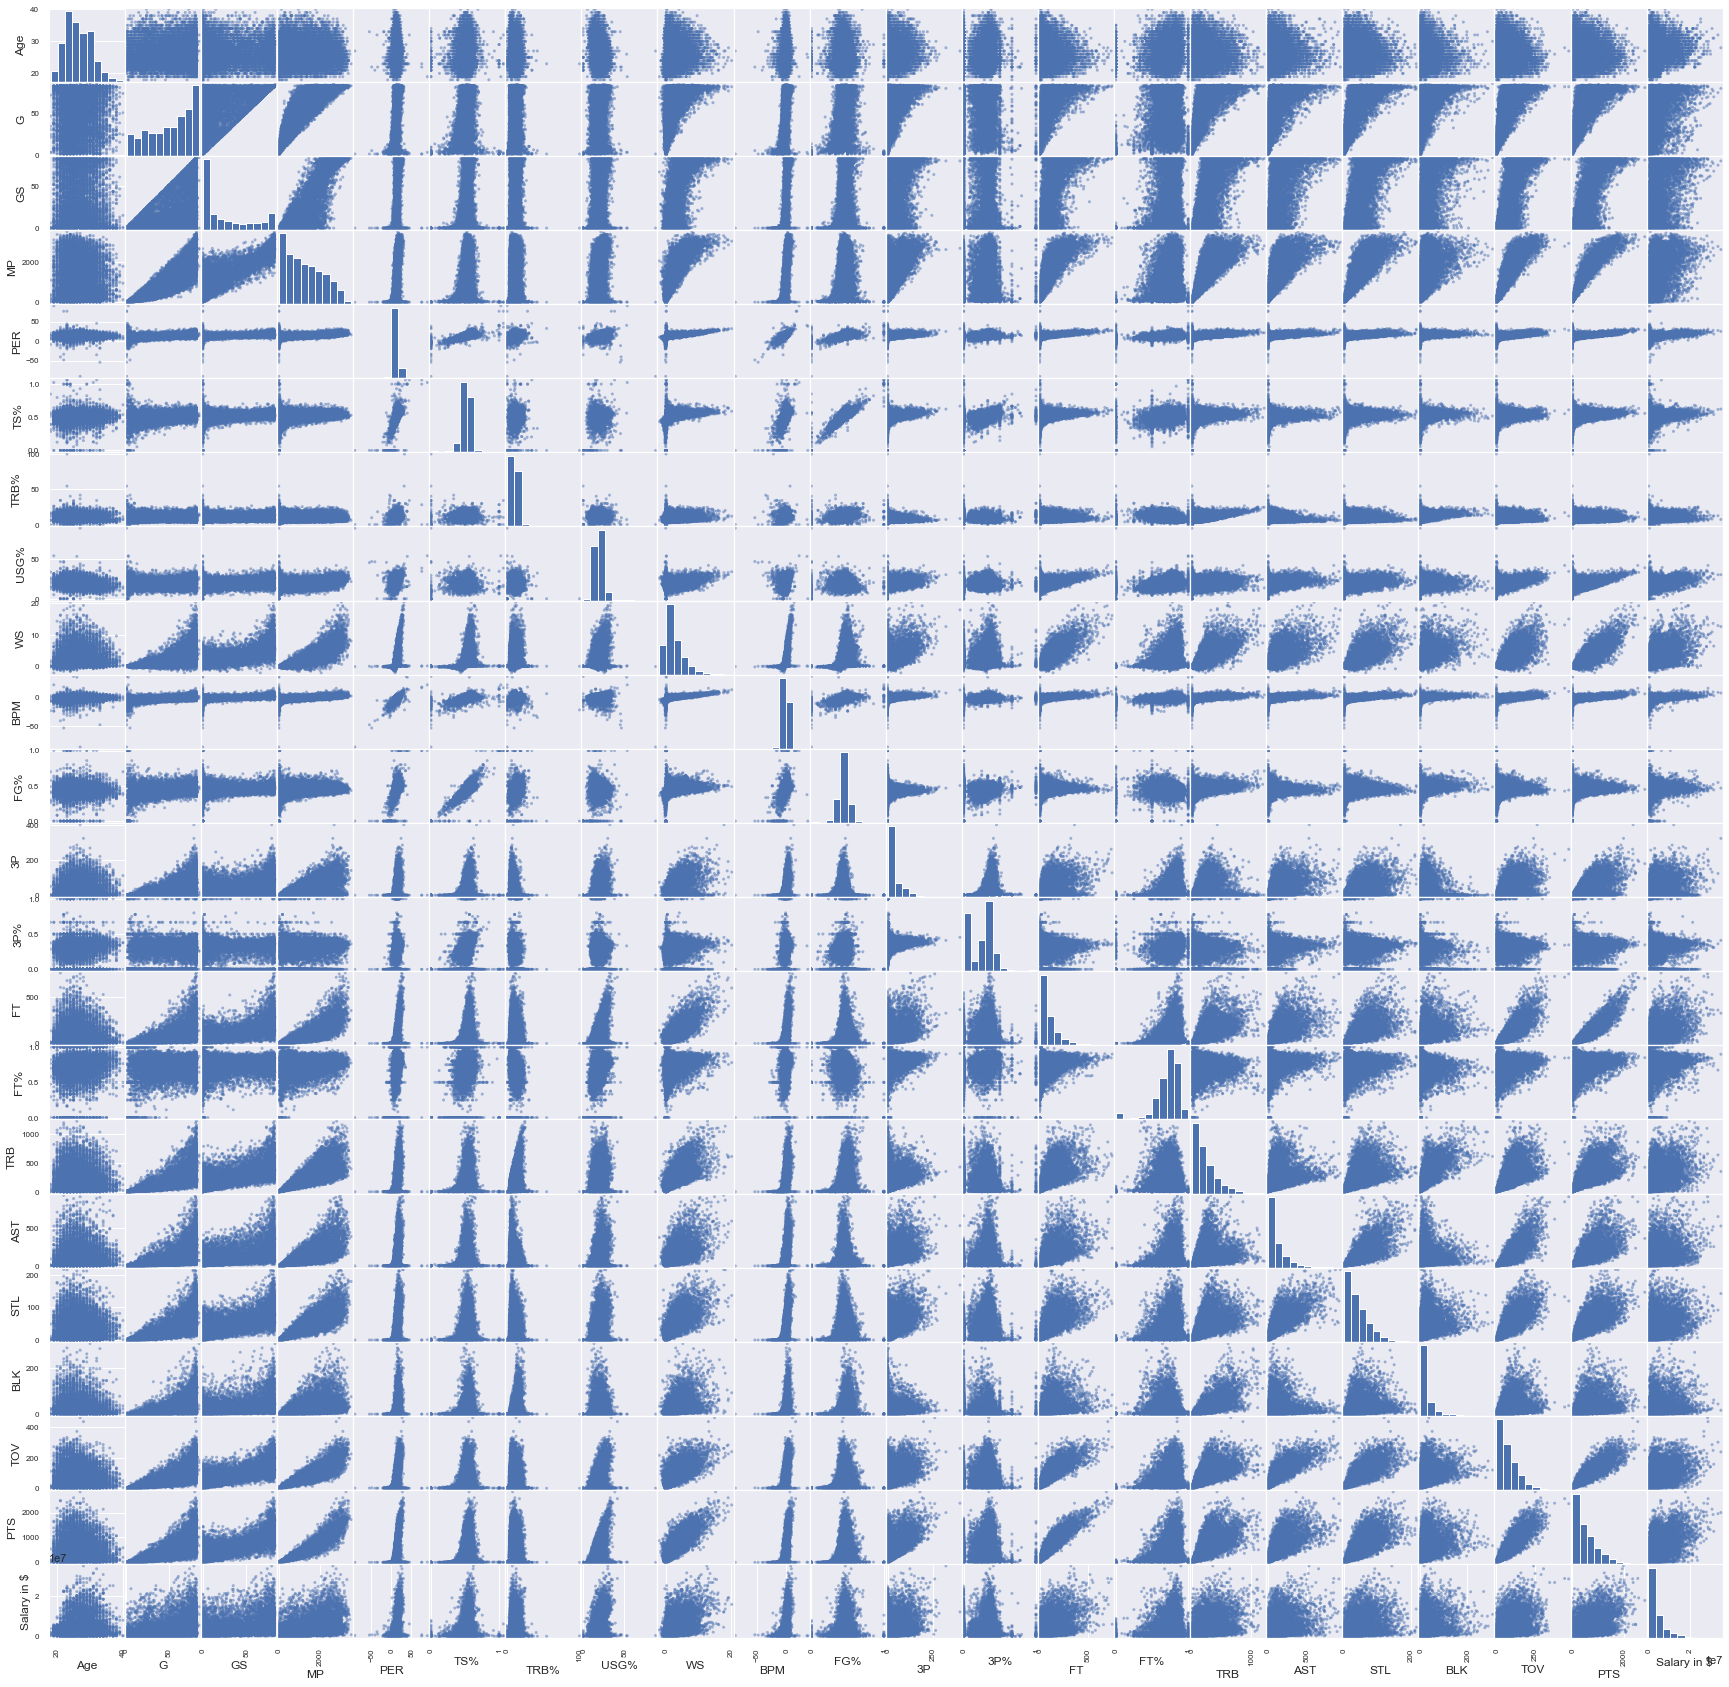

In [114]:
pd.plotting.scatter_matrix(merged_data.drop(['Name','Team','Pos','Season Start','Season End'], axis=1), figsize=(30,30));

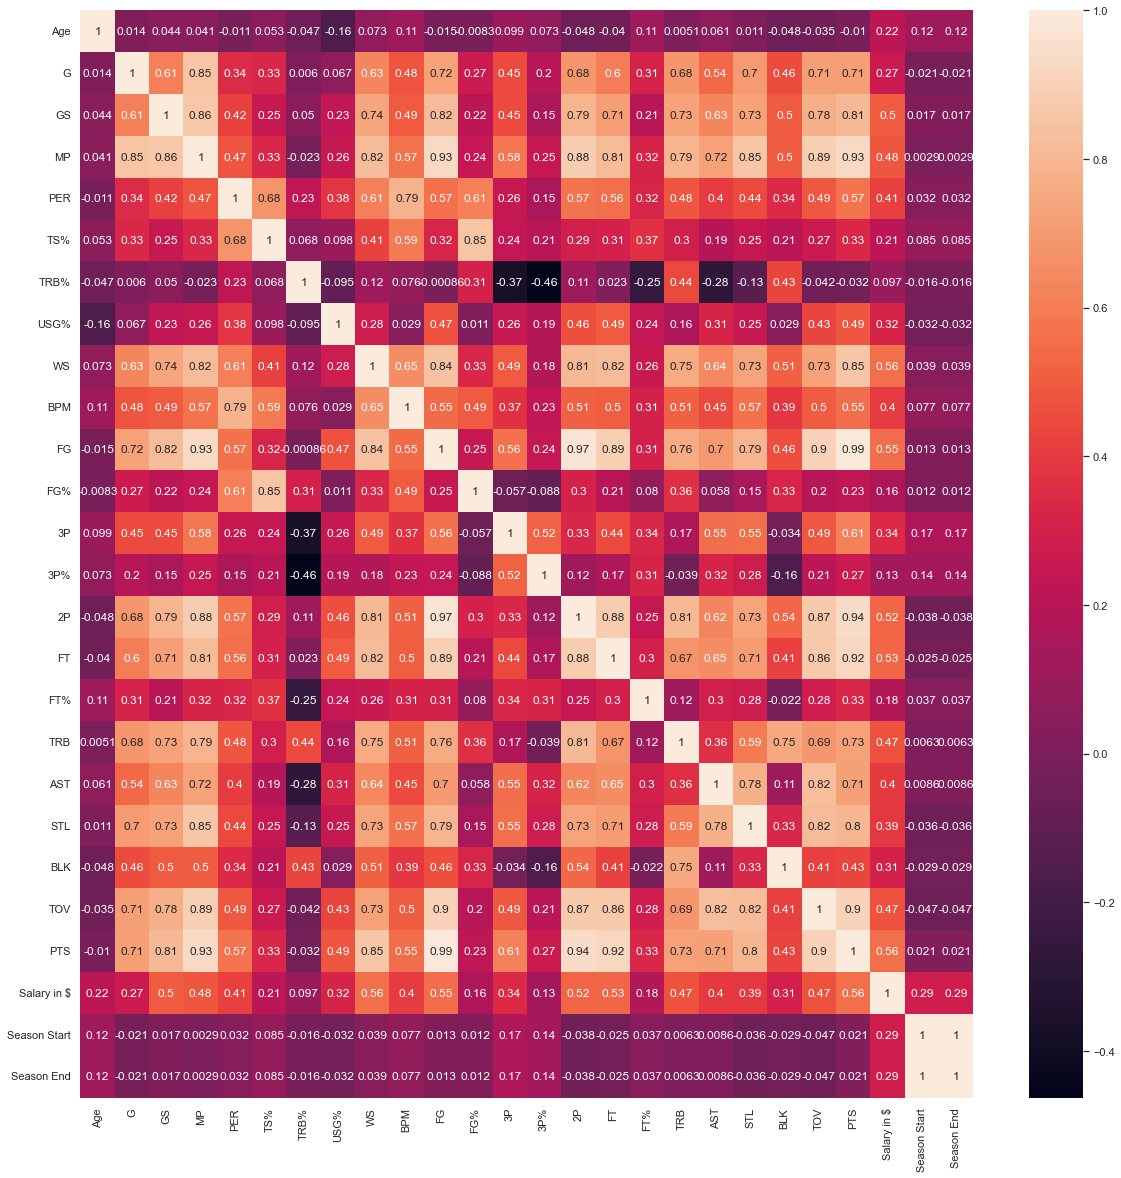

In [90]:
sns.heatmap(merged_data.corr(), annot=True)
plt.show()
sns.set(rc = {'figure.figsize':(20,20)})

Looking at the heatmap we see the highly correlated variables are: FG and points (0.99), 2P and Points (0.94), FG and 2P As a result, we'll remove the variables FG and 2P. 

In [91]:
merged_data = merged_data.drop(['FG', '2P'], axis=1)

### Now we will develop scatter matrix for the non advanced stats columns (just out of curiosity)

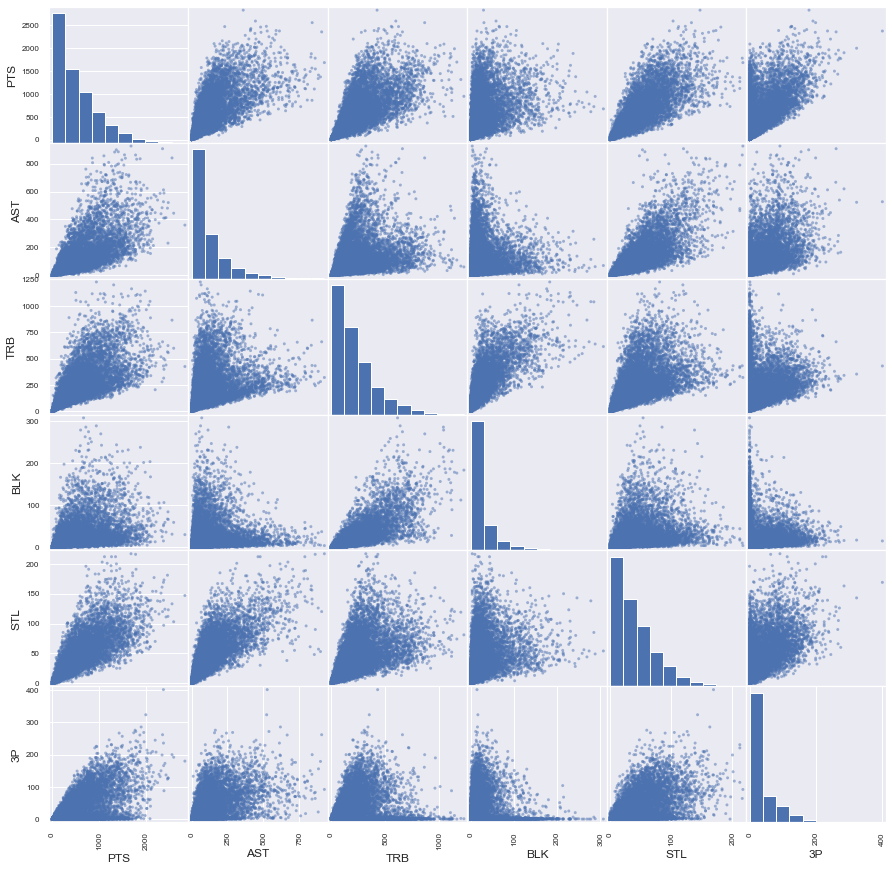

In [115]:
pd.plotting.scatter_matrix(merged_data[['PTS', 'AST', 'TRB', 'BLK', 'STL', '3P']], figsize=(15,15));

We don't see any major correlations between features so we will not remove any of these. Additionally, even in the larger scatter matrix earlier we do not see any other really correlated features outside of the ones we removed.

### Looking at the distributions of major (non-advanced stats) columns

(array([3.911e+03, 2.226e+03, 1.540e+03, 9.210e+02, 5.410e+02, 3.050e+02,
        1.200e+02, 4.000e+01, 1.400e+01, 3.000e+00]),
 array([   0. ,  283.2,  566.4,  849.6, 1132.8, 1416. , 1699.2, 1982.4,
        2265.6, 2548.8, 2832. ]),
 <BarContainer object of 10 artists>)

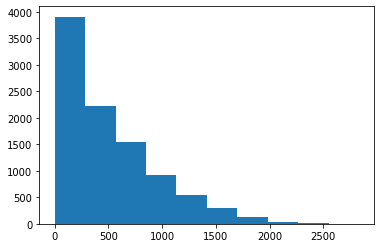

In [46]:
plt.hist(merged_data['PTS'])

(array([5739., 1994.,  910.,  454.,  247.,  145.,   58.,   47.,   15.,
          12.]),
 array([  0. ,  92.5, 185. , 277.5, 370. , 462.5, 555. , 647.5, 740. ,
        832.5, 925. ]),
 <BarContainer object of 10 artists>)

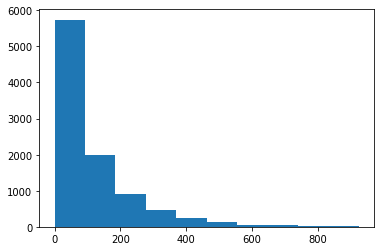

In [48]:
plt.hist(merged_data['AST'])

(array([7.166e+03, 1.427e+03, 5.180e+02, 2.370e+02, 1.540e+02, 6.100e+01,
        3.300e+01, 1.500e+01, 6.000e+00, 4.000e+00]),
 array([  0. ,  30.7,  61.4,  92.1, 122.8, 153.5, 184.2, 214.9, 245.6,
        276.3, 307. ]),
 <BarContainer object of 10 artists>)

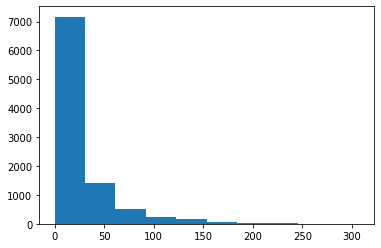

In [52]:
plt.hist(merged_data['BLK'])

(array([3575., 2421., 1666.,  954.,  552.,  254.,  113.,   56.,   20.,
          10.]),
 array([  0. ,  21.7,  43.4,  65.1,  86.8, 108.5, 130.2, 151.9, 173.6,
        195.3, 217. ]),
 <BarContainer object of 10 artists>)

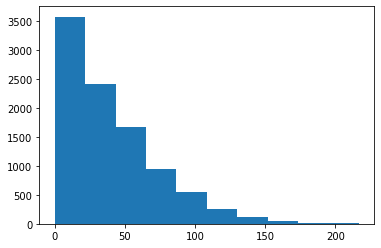

In [53]:
plt.hist(merged_data['STL'])

(array([3770., 2556., 1541.,  809.,  462.,  274.,  137.,   41.,   20.,
          11.]),
 array([   0. ,  122.6,  245.2,  367.8,  490.4,  613. ,  735.6,  858.2,
         980.8, 1103.4, 1226. ]),
 <BarContainer object of 10 artists>)

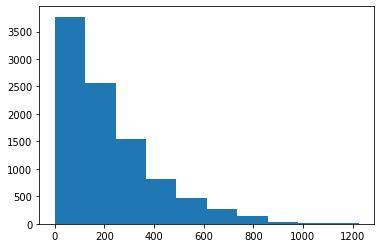

In [56]:
plt.hist(merged_data['TRB'])

(array([6.783e+03, 1.387e+03, 8.680e+02, 3.890e+02, 1.410e+02, 3.900e+01,
        1.100e+01, 1.000e+00, 1.000e+00, 1.000e+00]),
 array([  0. ,  40.2,  80.4, 120.6, 160.8, 201. , 241.2, 281.4, 321.6,
        361.8, 402. ]),
 <BarContainer object of 10 artists>)

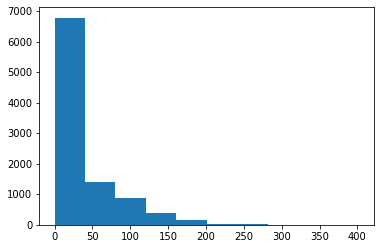

In [55]:
plt.hist(merged_data['3P'])

<AxesSubplot:xlabel='Season Start', ylabel='PTS'>

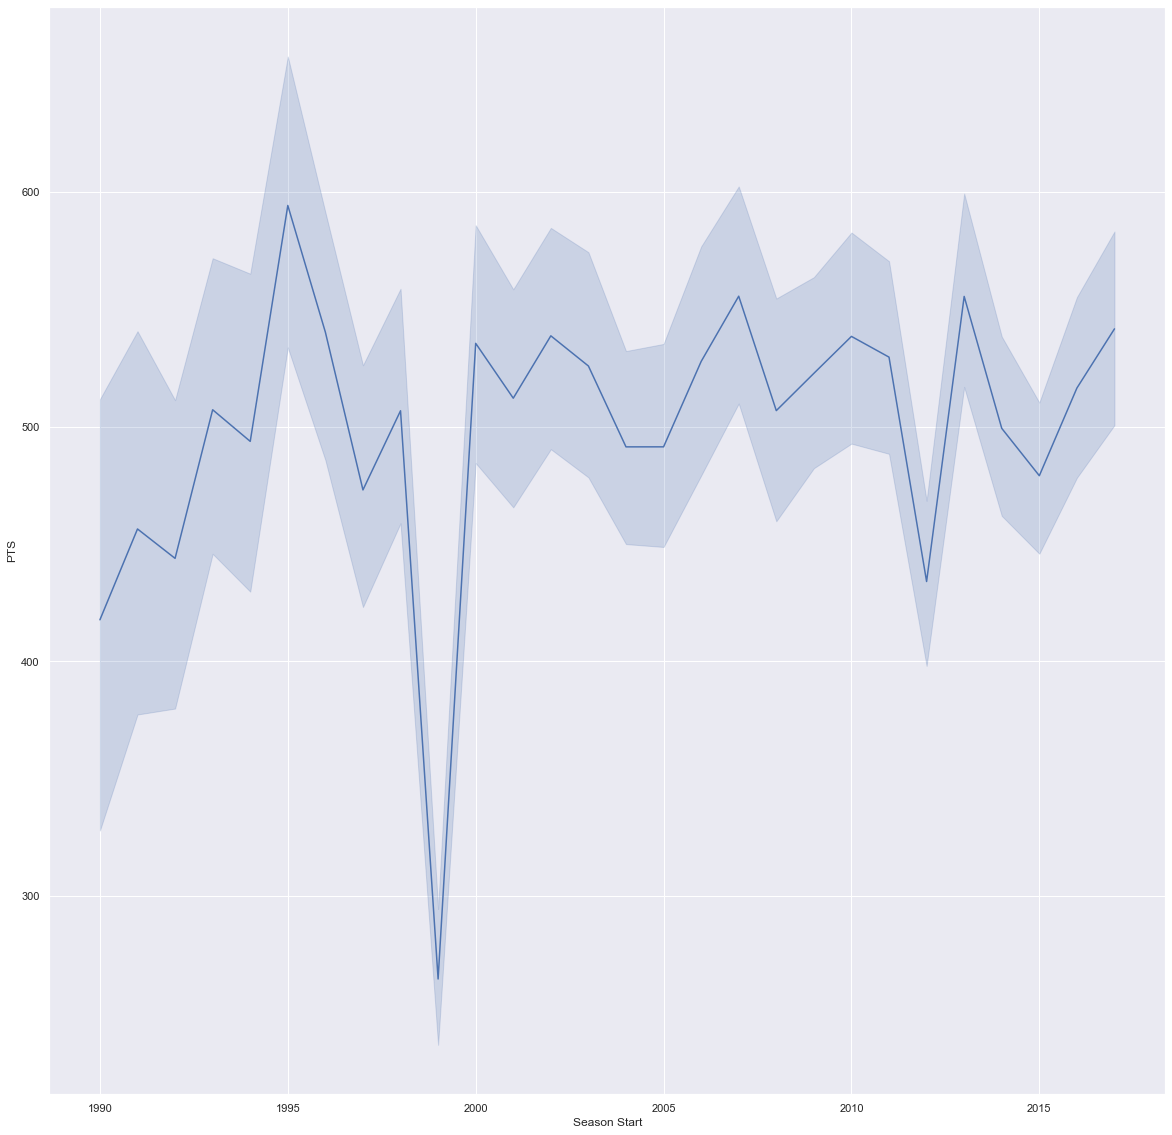

In [108]:
sns.lineplot(x=merged_data['Season Start'].astype(int), y=merged_data['PTS'].astype(int))

<AxesSubplot:xlabel='Season Start', ylabel='AST'>

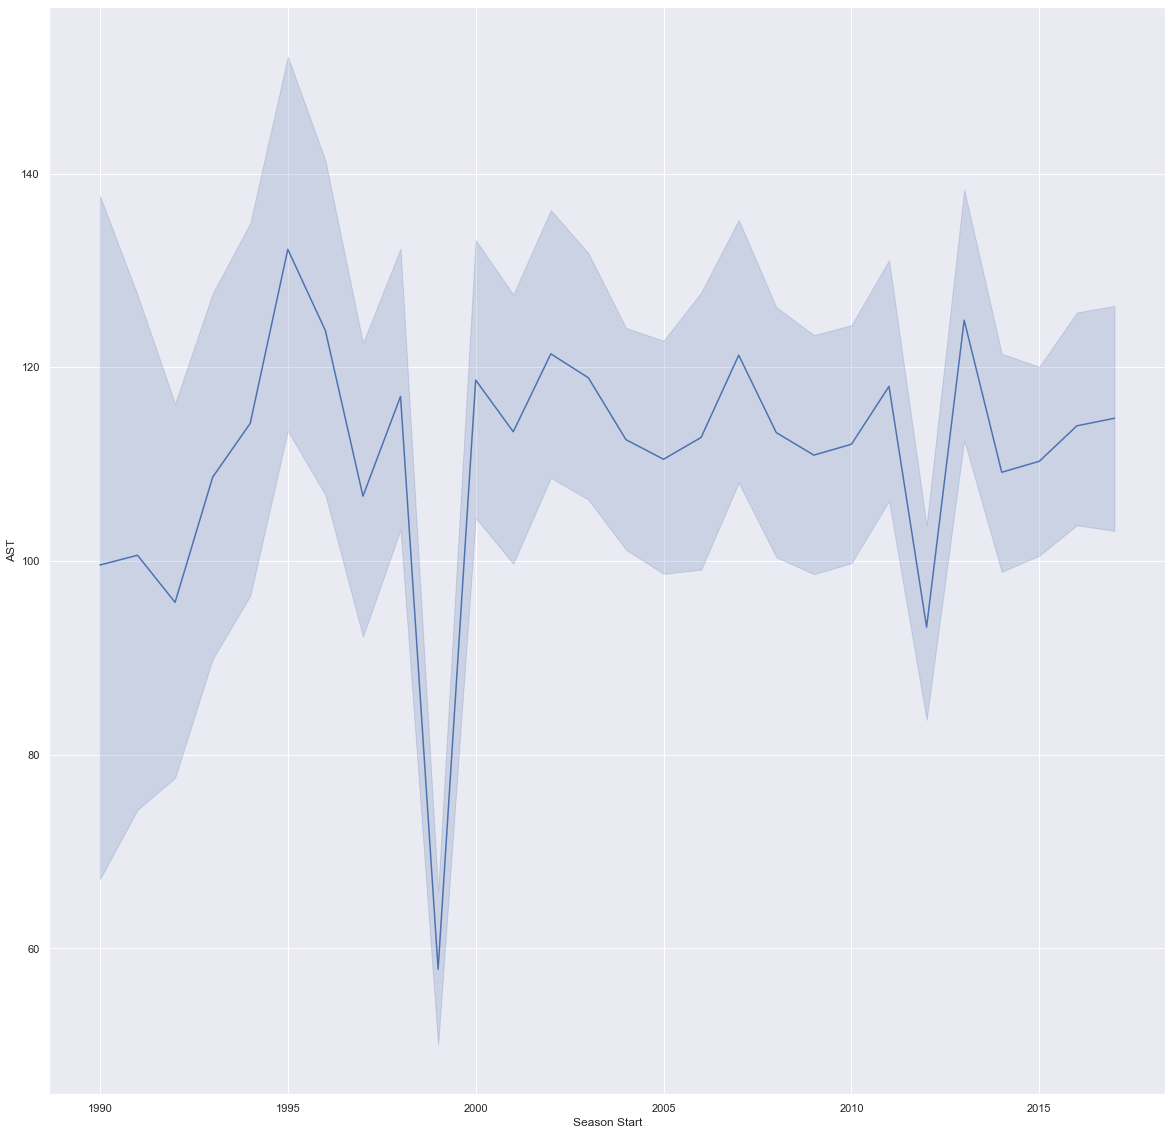

In [109]:
sns.lineplot(x=merged_data['Season Start'].astype(int), y=merged_data['AST'].astype(int))

<AxesSubplot:xlabel='Season Start', ylabel='TRB'>

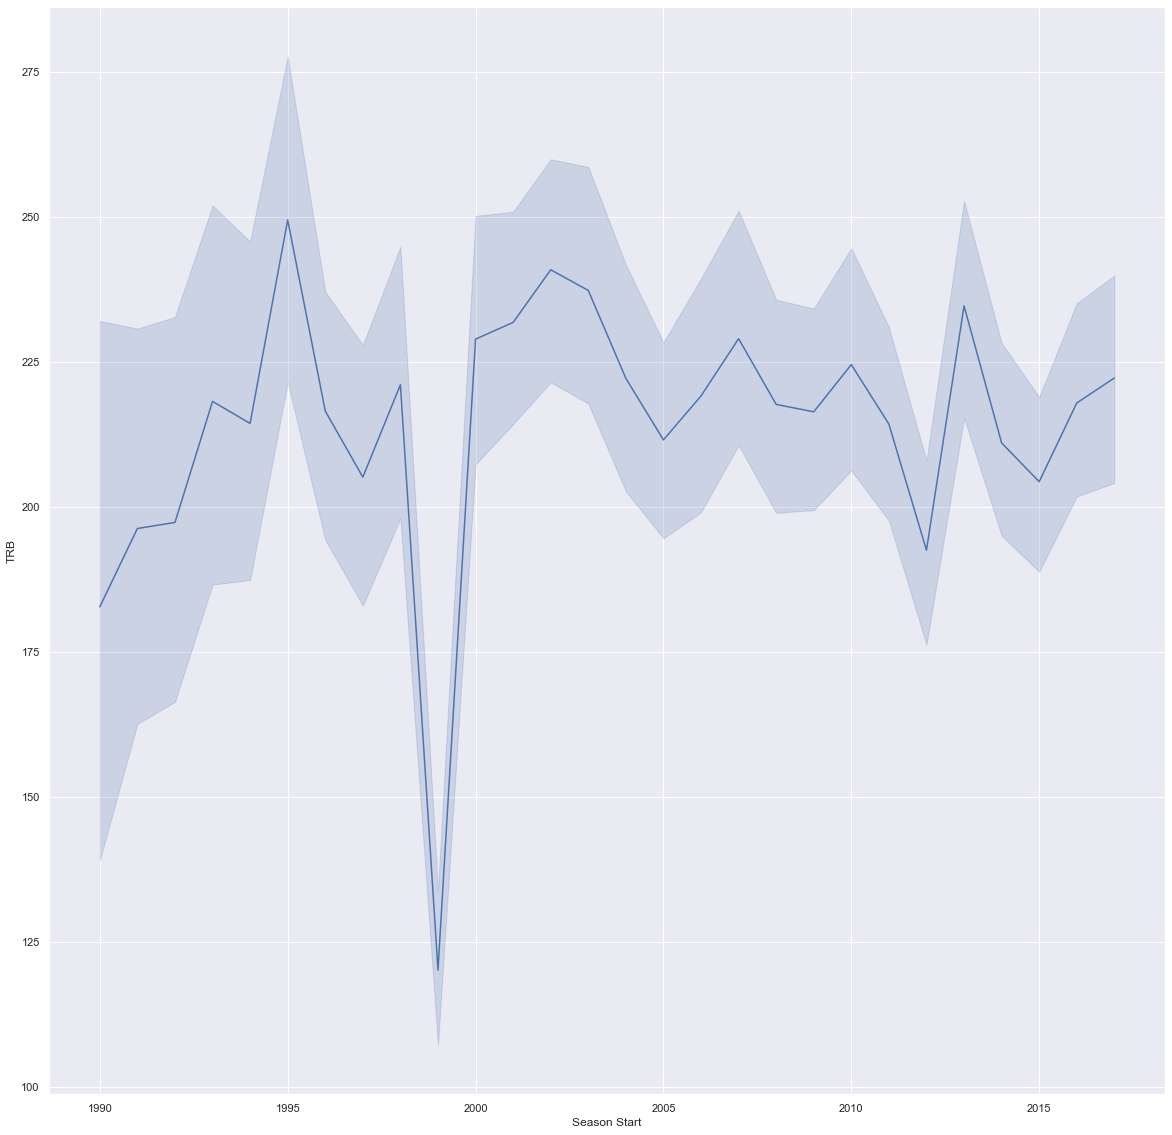

In [111]:
sns.lineplot(x=merged_data['Season Start'].astype(int), y=merged_data['TRB'].astype(int))

<AxesSubplot:xlabel='Season Start', ylabel='BLK'>

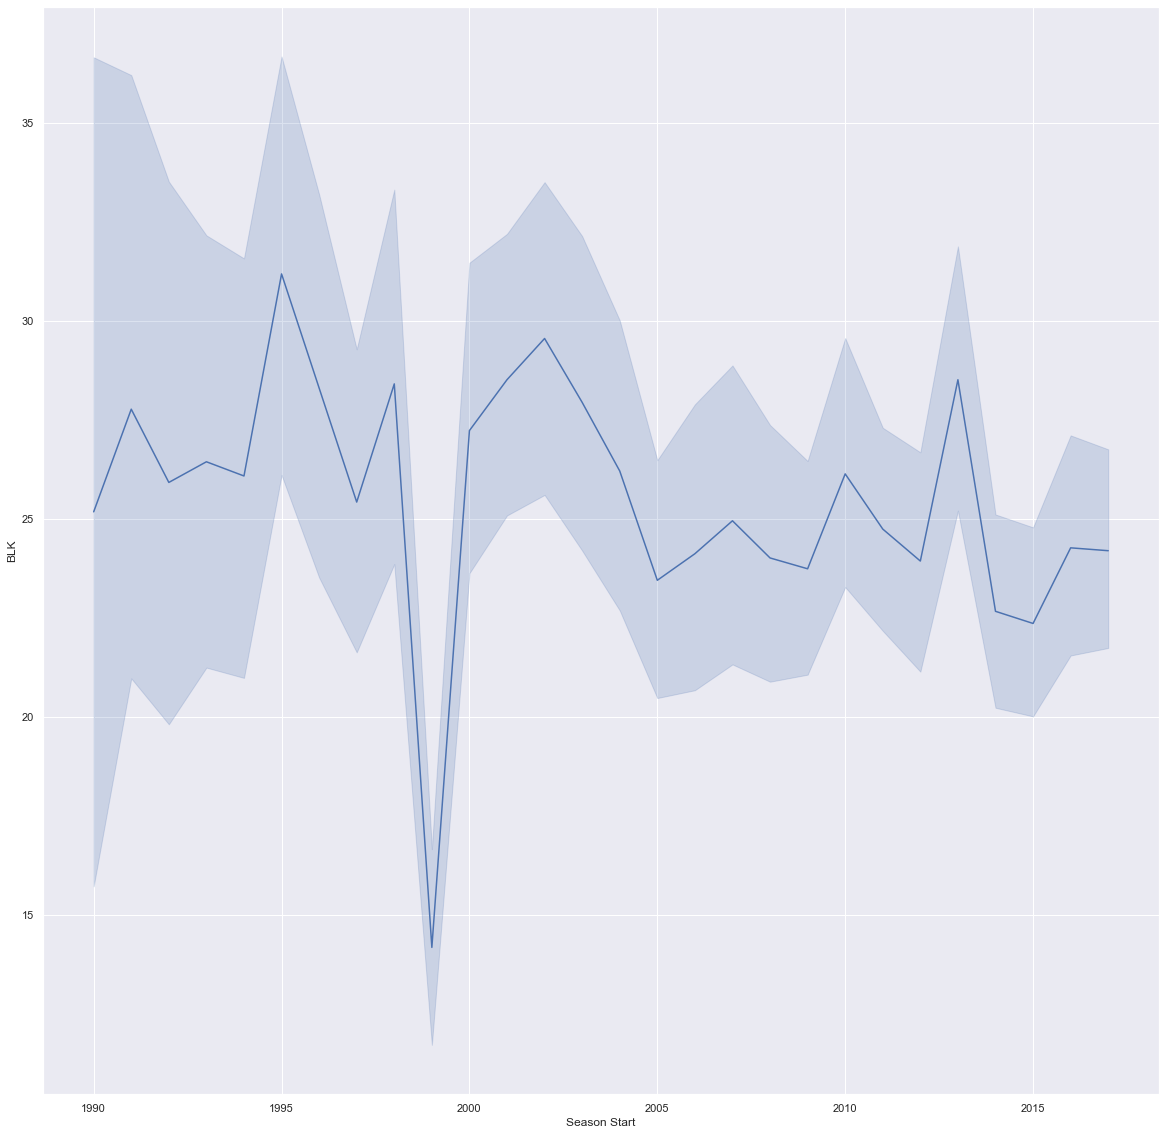

In [112]:
sns.lineplot(x=merged_data['Season Start'].astype(int), y=merged_data['BLK'].astype(int))

<AxesSubplot:xlabel='Season Start', ylabel='STL'>

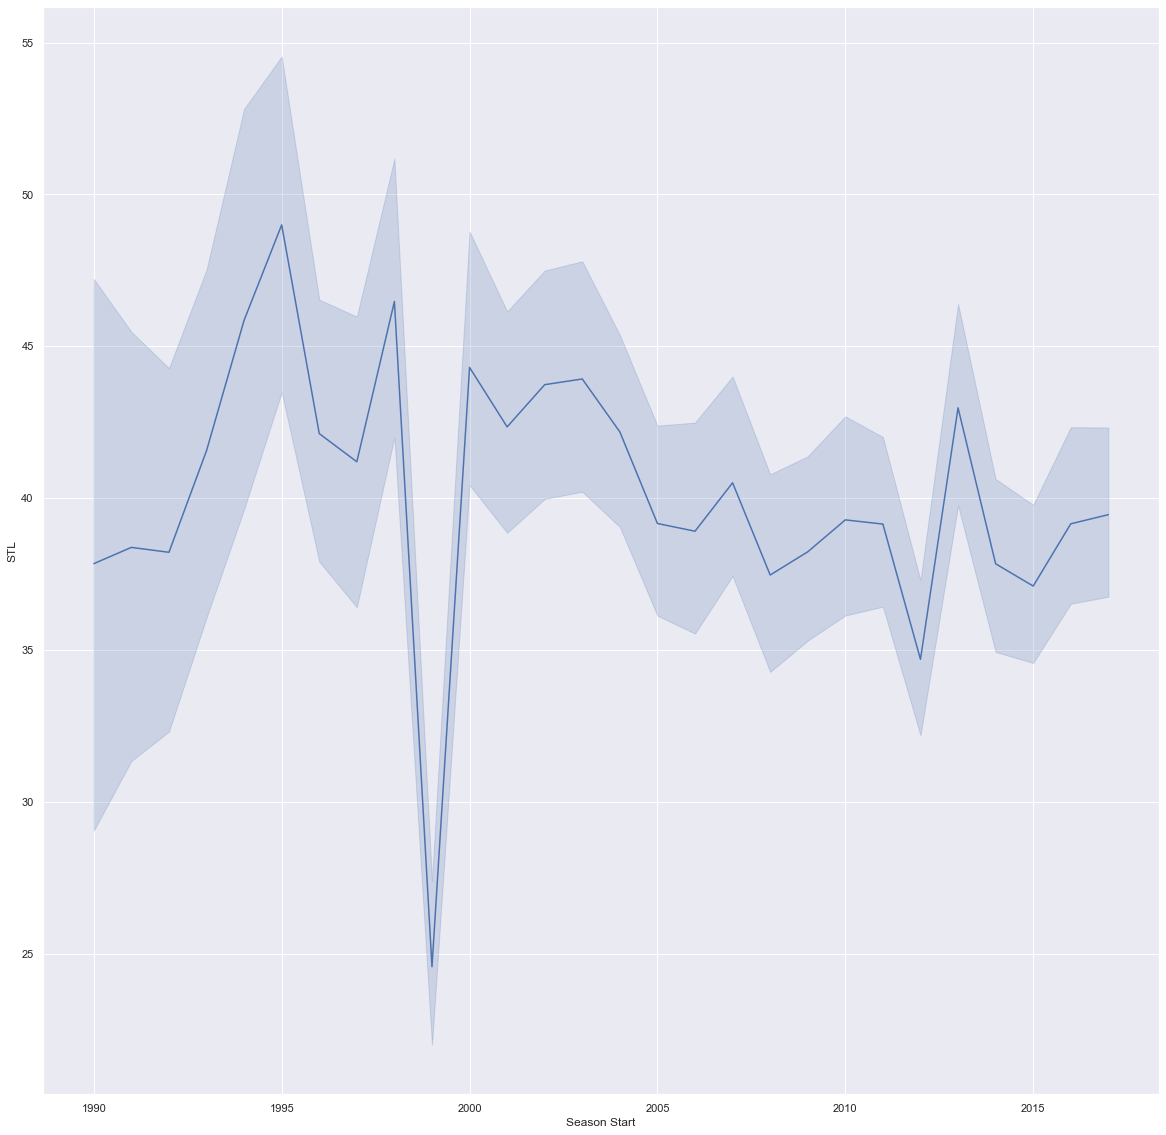

In [113]:
sns.lineplot(x=merged_data['Season Start'].astype(int), y=merged_data['STL'].astype(int))

We see how the values for the non-advanced stats features have changed over the years since 1990. We see that there are huge drops in 1998 and 2011. The reason for this is that these years correspond to lockouts that occurred in the NBA due to other reasons. We will make the decision to drop these years or not in the inferential analysis.

### Outliers

<AxesSubplot:>

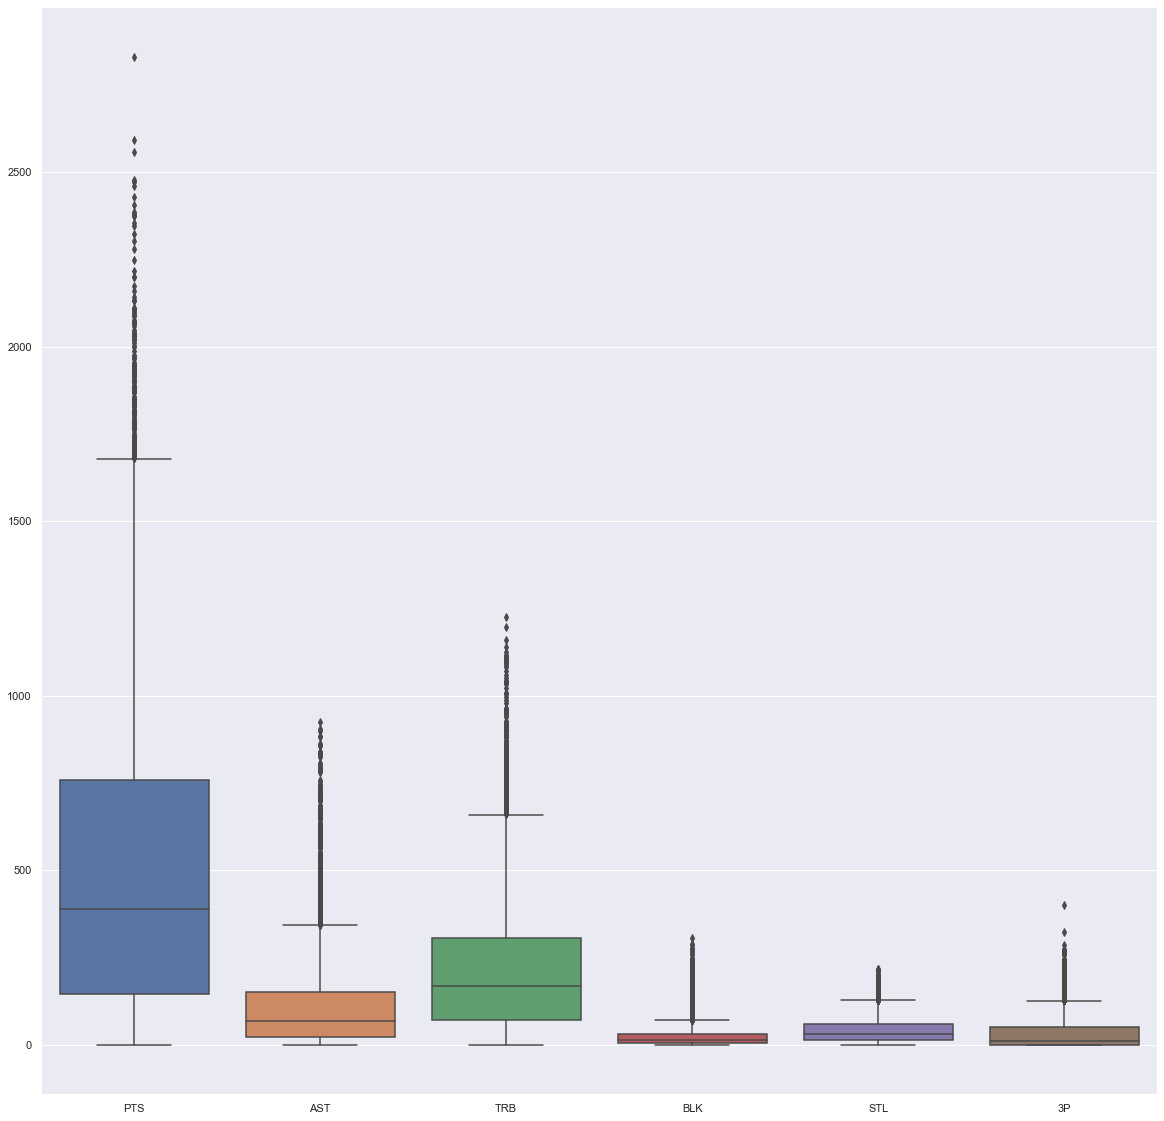

In [97]:
sns.boxplot(data=merged_data[['PTS', 'AST', 'TRB', 'BLK', 'STL', '3P']])

We see that there are a very high magnitude of outliers in these columns at the higher end. This indicates that there is a huge imbalance between stars and the average NBA player as there a large amount of them (but not as large compared to the players with low stats). Thus, in dictating salary, we see that a few players dominate the stats in categories (and are outliers) and they earn typically the higher salaries. 

In [98]:
sorted_3p = merged_data['3P'].sort_values()
sorted_pts =  merged_data['PTS'].sort_values()
sorted_ast =  merged_data['AST'].sort_values()
sorted_trb = merged_data['TRB'].sort_values()
sorted_blk = merged_data['BLK'].sort_values()
sorted_stl =  merged_data['STL'].sort_values()

# 3p
q1,q3 = np.percentile(sorted_3p,[25,75])
iqr = q3 - q1
lower_bound_3p = q1 -(1.5 * iqr) 
upper_bound_3p = q3 +(1.5 * iqr) 

# PTS
q1,q3 = np.percentile(sorted_pts,[25,75])
iqr = q3 - q1
lower_bound_pts = q1 -(1.5 * iqr) 
upper_bound_pts = q3 +(1.5 * iqr) 

# AST
q1,q3 = np.percentile(sorted_ast,[25,75])
iqr = q3 - q1
lower_bound_ast = q1 -(1.5 * iqr) 
upper_bound_ast = q3 +(1.5 * iqr) 

#TRB 
q1,q3 = np.percentile(sorted_trb,[25,75])
iqr = q3 - q1
lower_bound_trb = q1 -(1.5 * iqr) 
upper_bound_trb = q3 +(1.5 * iqr) 

# STL
q1,q3 = np.percentile(sorted_stl,[25,75])
iqr = q3 - q1
lower_bound_stl = q1 -(1.5 * iqr) 
upper_bound_stl = q3 +(1.5 * iqr)

In [99]:
merged_data[(merged_data['3P'] < lower_bound_3p) | (merged_data['3P'] > upper_bound_3p)]['3P']

450     135.0
581     141.0
608     179.0
616     197.0
619     199.0
        ...  
9559    268.0
9584    240.0
9593    200.0
9602    163.0
9614    170.0
Name: 3P, Length: 493, dtype: float64

In [100]:
merged_data[(merged_data['PTS'] < lower_bound_pts) | (merged_data['PTS'] > upper_bound_pts)]['PTS']

357     1810.0
581     1720.0
616     1686.0
713     1926.0
809     1729.0
         ...  
9566    2061.0
9584    1830.0
9585    1805.0
9593    2558.0
9597    1933.0
Name: PTS, Length: 190, dtype: float64

In [101]:
merged_data[(merged_data['AST'] < lower_bound_ast) | (merged_data['AST'] > upper_bound_ast)]['AST']

11      619.0
39      554.0
53      441.0
66      624.0
116     734.0
        ...  
9557    449.0
9584    435.0
9585    831.0
9593    840.0
9599    360.0
Name: AST, Length: 624, dtype: float64

In [102]:
merged_data[(merged_data['TRB'] < lower_bound_trb) | (merged_data['TRB'] > upper_bound_trb)]['TRB']

38       691.0
61       759.0
65       666.0
88       679.0
107      686.0
         ...  
9566    1007.0
9574     759.0
9580     779.0
9593     864.0
9596    1088.0
Name: TRB, Length: 366, dtype: float64

In [103]:
merged_data[(merged_data['STL'] < lower_bound_stl) | (merged_data['STL'] > upper_bound_stl)]['STL']

11      145.0
39      133.0
53      169.0
116     131.0
156     170.0
        ...  
9306    154.0
9395    132.0
9423    134.0
9585    157.0
9593    133.0
Name: STL, Length: 221, dtype: float64

Using the formula 1.5 times IQR, we find the lower and upper bounds for the non-advanced stats for each of them separately and get snippets of the typical outlier values in these non advanced stats features.

### Results

In this EDA segment, we were able to discover highly correlated features via a heatmap and a scatter matrix and remove one of them, Observe the distribution of non-advanced stats features as histograms, as well as see how they changed over the years, and also observe and get the typical values for outliers in our dataset via a boxplot.